# Neural Network Regression

In [43]:
import torch
import scipy.io as io
import plotly.offline as py
import plotly.graph_objs as go
import json
import numpy as np
py.init_notebook_mode(connected=True)

In [44]:
mat = io.loadmat('data_Mg_GBperatom_seg_2Al_dump.mat')
length_A = mat['A'].shape[1]
for i in range(30):
    segE = mat['A']['Eseg'][0,i]
    #check whether this is a valid data?
    n1 = segE[:,0] != 0 
    segE = np.squeeze(segE[n1,:])
    atom_ID = segE[:,0].astype(int) - 1

    descriptor = mat['A']['peratom'][0,i][0,0]
    descriptor_temp = np.concatenate([descriptor['pos'],descriptor['pe'],descriptor['cna'],descriptor['centro_fnn'],
                                descriptor['centro_snn'],descriptor['coord'],descriptor['f'],descriptor['stress'],
                                descriptor['voronoi']], axis = 1)
    if i == 0:
        descriptor_all = descriptor_temp[atom_ID]
        segE_all = segE
    else:
        descriptor_temp = descriptor_temp[atom_ID]
        descriptor_all = np.concatenate([descriptor_all, descriptor_temp], axis = 0)
        segE_all = np.concatenate([segE_all, segE])

descriptor_all[:,2] = abs(descriptor_all[:,2]-min(descriptor_all[:,2])-20)
sigma_H = np.sum(descriptor_all[:,11:14], axis = 1)/3
f_mag = np.linalg.norm(descriptor_all[:,8:11], axis = 1, ord = 2)

feature = np.concatenate([descriptor_all, sigma_H[:,np.newaxis], f_mag[:,np.newaxis]], axis = 1)

In [45]:
y_true = segE_all[:,1]
#We should consider the coordinates don't matter.
feature1 = feature[:,3:]
#feature1 = feature1/np.max(feature1)
#feature_space = np.concatenate([np.ones((feature1.shape[0],1)), feature1], axis = 1)
feature_space = feature1
#random shuffle
np.random.seed(10)
idx0 = np.random.permutation(np.arange(len(feature_space)))
feature_space = feature_space[idx0]
y_true = y_true[idx0]
#divide data into training, crossvalildation and test sets.
X_train = feature_space[0:int(len(feature_space)*.7)]
X_mean = np.mean(X_train, axis = 0)
X_std = np.std(X_train, axis = 0)
X_train = (X_train - X_mean)/X_std
X_temp = feature_space[int(len(feature_space)*.7):]
X_temp = (X_temp - X_mean)/X_std
X_cos = X_temp[:int(len(X_temp)*.5)]
X_test = X_temp[int(len(X_temp)*.5):]
Y_train = y_true[0:int(len(feature_space)*.7)]
Y_mean = np.mean(Y_train, axis = 0)
Y_std = np.std(Y_train, axis = 0)
#Y_train = (Y_train - Y_mean)/Y_std
Y_temp = y_true[int(len(feature_space)*.7):]
#Y_temp = (Y_temp - Y_mean)/Y_std
Y_cos = Y_temp[:int(len(X_temp)*.5)]
Y_test = Y_temp[int(len(X_temp)*.5):]


In [46]:
(N, D_in) = X_train.shape
H = 10
D_out = 1

X_train = torch.from_numpy(X_train)
X_train = X_train.float()
y = torch.from_numpy(Y_train)
y = y.float()
y = y.view(y.shape[0],1)
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-4
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)
    

In [47]:
for t in range(50000):
    y_pred = model(X_train)
    
    loss = loss_fn(y_pred, y)
    if t%1000 == 0:
        print(t, loss.item())
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

0 458.54571533203125
1000 1.4848653078079224
2000 1.3319977521896362
3000 1.2951635122299194
4000 1.2268391847610474
5000 1.2079517841339111
6000 1.1846418380737305
7000 1.173651933670044
8000 1.1609891653060913
9000 1.1322550773620605
10000 1.1240968704223633
11000 1.1189848184585571
12000 1.1155718564987183
13000 1.1120407581329346
14000 1.1097846031188965
15000 1.1086738109588623
16000 1.1077065467834473
17000 1.1066499948501587
18000 1.1060620546340942
19000 1.1055909395217896
20000 1.1050869226455688
21000 1.1047842502593994
22000 1.1045788526535034
23000 1.1043946743011475
24000 1.1042362451553345
25000 1.1039414405822754
26000 1.1037914752960205
27000 1.1036546230316162
28000 1.1035127639770508
29000 1.1034091711044312
30000 1.103318691253662
31000 1.1032423973083496
32000 1.1031712293624878
33000 1.1031103134155273
34000 1.103053092956543
35000 1.1029962301254272
36000 1.1029465198516846
37000 1.1028822660446167
38000 1.1028361320495605
39000 1.102797508239746
40000 1.102759003

In [48]:
for t in range(50000):
    y_pred = model(X_train)
    
    loss = loss_fn(y_pred, y)
    if t%1000 == 0:
        print(t, loss.item())
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

0 1.10255765914917
1000 1.1025488376617432
2000 1.1025400161743164
3000 1.102527379989624
4000 1.1025199890136719
5000 1.1025116443634033
6000 1.1025053262710571
7000 1.1025007963180542
8000 1.102491021156311
9000 1.1024870872497559
10000 1.1024771928787231
11000 1.102471113204956
12000 1.102466344833374
13000 1.1024622917175293
14000 1.1024563312530518
15000 1.1024539470672607
16000 1.102448582649231
17000 1.1024435758590698
18000 1.1024399995803833
19000 1.1024367809295654
20000 1.102433443069458
21000 1.1024295091629028
22000 1.102427363395691
23000 1.1024250984191895
24000 1.1024240255355835
25000 1.1024199724197388
26000 1.1024199724197388
27000 1.1024163961410522
28000 1.1024150848388672
29000 1.1024137735366821
30000 1.1024105548858643
31000 1.1024090051651
32000 1.1024061441421509
33000 1.1024065017700195
34000 1.1024038791656494
35000 1.1024028062820435
36000 1.102401614189148
37000 1.102400302886963
38000 1.1023995876312256
39000 1.1023999452590942
40000 1.1023974418640137
41

In [49]:
y

tensor([[0.0633],
        [0.0551],
        [0.0593],
        ...,
        [0.0638],
        [0.1122],
        [0.0543]])

In [50]:
y_pred

tensor([[0.0711],
        [0.0559],
        [0.0584],
        ...,
        [0.0637],
        [0.0814],
        [0.0555]], grad_fn=<AddmmBackward>)

In [51]:
r = y - y_pred

In [56]:
r.detach()

tensor([[-0.0078],
        [-0.0008],
        [ 0.0009],
        ...,
        [ 0.0001],
        [ 0.0308],
        [-0.0012]])

# Gradient Boosting Method

In [84]:
(N, D_in) = X_train.shape
H = 10
D_out = 1
r = (y - y_pred).detach()
r = (r - r.mean())/r.std()
model_boost = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-4
optimizer_boost = torch.optim.SGD(model_boost.parameters(), lr = learning_rate, momentum = 0.9)
    

In [85]:
for t in range(50000):
    r_pred = model_boost(X_train)
    loss_boost = loss_fn(r_pred, r)
    if t%1000 == 0:
        print(t, loss_boost.item())
    
    optimizer_boost.zero_grad()
    
    loss_boost.backward()
    
    optimizer_boost.step()

0 10299.4814453125
1000 8786.791015625
2000 8671.2265625
3000 8636.1240234375
4000 8606.3876953125
5000 8594.529296875
6000 8580.7265625
7000 8576.7890625
8000 8582.173828125
9000 8702.1845703125
10000 8696.7451171875
11000 8688.9609375
12000 8703.0546875
13000 8695.0810546875
14000 8781.486328125
15000 8698.873046875
16000 8702.892578125
17000 8708.5869140625
18000 8731.15234375
19000 8693.4951171875
20000 8698.8623046875
21000 8721.6435546875
22000 8699.2841796875
23000 8702.28125
24000 8680.841796875
25000 8683.6748046875
26000 8707.10546875
27000 8705.587890625
28000 8688.76171875
29000 8691.1796875
30000 8749.8720703125
31000 8683.439453125
32000 8686.8330078125
33000 8680.11328125
34000 8690.419921875
35000 8692.3486328125
36000 8692.9775390625
37000 8701.4951171875
38000 8683.4111328125
39000 8677.421875
40000 8676.794921875
41000 8685.6240234375
42000 8696.9189453125
43000 8674.3486328125
44000 8698.4921875
45000 8685.4189453125
46000 8686.88671875
47000 8702.0166015625
48000 8

In [86]:
r

tensor([[-0.7431],
        [-0.0790],
        [ 0.0880],
        ...,
        [ 0.0096],
        [ 2.9255],
        [-0.1136]])

In [87]:
r_pred

tensor([[0.0110],
        [0.0110],
        [0.0110],
        ...,
        [0.0110],
        [3.0075],
        [0.0110]], grad_fn=<AddmmBackward>)

In [21]:
Y_mean = np.mean(Y_train)
SS_tot = torch.sum(torch.pow(y - Y_mean, 2))
SS_res = torch.sum(torch.pow(y_pred-y, 2))
R_squared = 1-SS_res/SS_tot

In [22]:
R_squared

tensor(0.9279, grad_fn=<RsubBackward1>)

In [23]:
SS_res/X_train.shape[0]

tensor(0.0001, grad_fn=<DivBackward0>)

In [24]:
X_test = torch.from_numpy(X_test)
X_test = X_test.float()
Y_test_pred = model(X_test)


In [25]:
Y_test_pred = Y_test_pred.detach().numpy()

In [26]:
Y_test_pred = Y_test_pred.squeeze()

In [27]:
Y_test = Y_test.squeeze()

In [28]:
Y_mean = np.mean(Y_test)
SS_tot = np.sum(np.power(Y_test - Y_mean, 2))
SS_res = np.sum(np.power(Y_test_pred - Y_test, 2))
R_squared = 1-SS_res/SS_tot

In [29]:
R_squared

0.9294066038580301

In [30]:
SS_res/Y_test.shape

array([0.00016164])

In [31]:
Y_test.shape

(2135,)

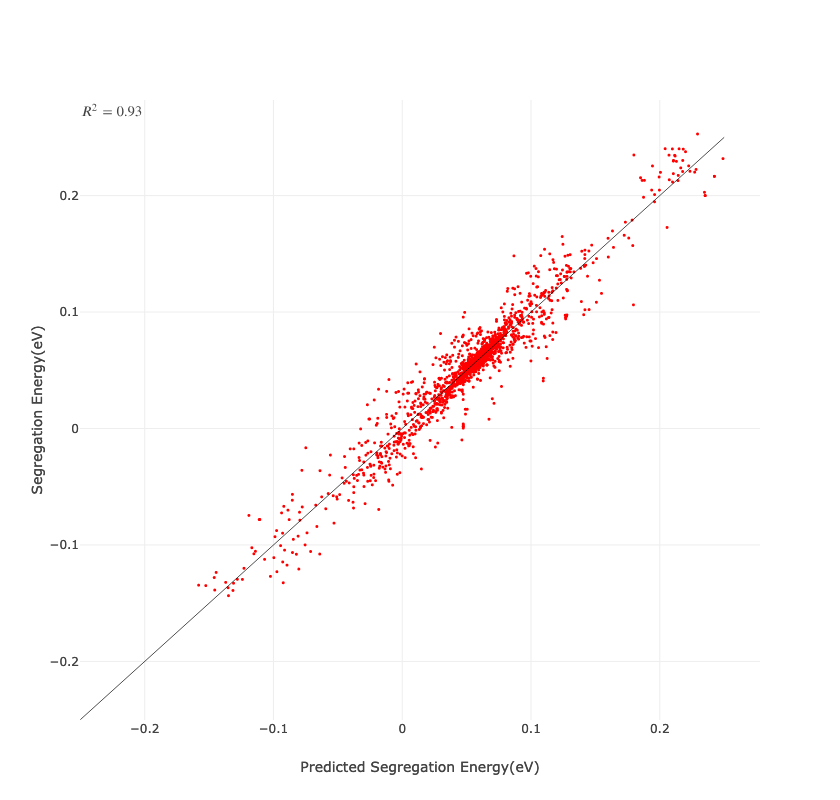

In [32]:
#draw correlation
main = go.Scatter(x = Y_test_pred, 
          y = Y_test, 
          marker={'color':'red', 'symbol':'circle','size':3}, 
          mode='markers'
         )

data = [main]

layout = go.Layout(autosize = False, 
           height = 800,
           width = 800, 
           xaxis={'title':"Predicted Segregation Energy(eV)", 'zeroline':False},
           yaxis = {'title':'Segregation Energy(eV)', 'zeroline':False},
           annotations = [
                   dict(
                   x = 0,
                   y = 1,
                   xref = 'paper',
                   yref = 'paper',
                   text = '$R^2= %4.2f$'%(R_squared),
                   showarrow = False,
                   font = dict(size = 12)
                   )
               ],
           shapes =[{'type':'line', 
                            'x0':-0.25,
                            'x1':0.25,
                            'y0':-0.25,
                            'y1':0.25,
                            'line':{'width':0.7}
                    }],
          )
plot = py.iplot(go.Figure(data = data, layout = layout))

In [218]:
PATH = 'model.pt'
torch.save(model, PATH)

# Three Layer Neural Network

In [205]:
y_true = segE_all[:,1]
#We should consider the coordinates don't matter.
feature1 = feature[:,3:]
#feature1 = feature1/np.max(feature1)
#feature_space = np.concatenate([np.ones((feature1.shape[0],1)), feature1], axis = 1)
feature_space = feature1
#random shuffle
np.random.seed(10)
idx0 = np.random.permutation(np.arange(len(feature_space)))
feature_space = feature_space[idx0]
y_true = y_true[idx0]
#divide data into training, crossvalildation and test sets.
X_train = feature_space[0:int(len(feature_space)*.7)]
X_mean = np.mean(X_train, axis = 0)
X_std = np.std(X_train, axis = 0)
X_train = (X_train - X_mean)/X_std
X_temp = feature_space[int(len(feature_space)*.7):]
X_temp = (X_temp - X_mean)/X_std
X_cos = X_temp[:int(len(X_temp)*.5)]
X_test = X_temp[int(len(X_temp)*.5):]
Y_train = y_true[0:int(len(feature_space)*.7)]
Y_mean = np.mean(Y_train, axis = 0)
Y_std = np.std(Y_train, axis = 0)
#Y_train = (Y_train - Y_mean)/Y_std
Y_temp = y_true[int(len(feature_space)*.7):]
#Y_temp = (Y_temp - Y_mean)/Y_std
Y_cos = Y_temp[:int(len(X_temp)*.5)]
Y_test = Y_temp[int(len(X_temp)*.5):]


In [206]:
(N, D_in) = X_train.shape
H = 30
D_out = 1

X_train = torch.from_numpy(X_train)
X_train = X_train.float()
y = torch.from_numpy(Y_train)
y = y.float()
y = y.view(y.shape[0],1)
model1 = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out)
)

loss_fn1 = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-4
optimizer1 = torch.optim.SGD(model1.parameters(), lr = learning_rate, momentum = 0.9, weight_decay = 0.3)#0.2
    

In [207]:
for t in range(50000):
    y_pred = model1(X_train)
    
    loss = loss_fn1(y_pred, y)
    if t%500 == 0:
        print(t, loss.item())
    
    optimizer1.zero_grad()
    
    loss.backward()
    
    optimizer1.step()

0 418.5428161621094
500 1.3384084701538086
1000 1.1333906650543213
1500 1.0289233922958374
2000 0.9585827589035034
2500 0.909266471862793
3000 0.8740422129631042
3500 0.8498745560646057
4000 0.8328794240951538
4500 0.8137098550796509
5000 0.8016047477722168
5500 0.7885846495628357
6000 0.7787113785743713
6500 0.7675730586051941
7000 0.7572225332260132
7500 0.7498250603675842
8000 0.744106650352478
8500 0.7375442385673523
9000 0.7332517504692078
9500 0.7298823595046997
10000 0.7271217703819275
10500 0.7231999039649963
11000 0.7192045450210571
11500 0.7162289619445801
12000 0.714130699634552
12500 0.7119353413581848
13000 0.7106567025184631
13500 0.7106426358222961
14000 0.7093873023986816
14500 0.7100834846496582
15000 0.7082454562187195
15500 0.7098730802536011
16000 0.724212646484375
16500 0.7160510420799255
17000 0.7150899767875671
17500 0.714614987373352
18000 0.7011159658432007
18500 0.7045876383781433
19000 0.7104361653327942
19500 0.7100635766983032
20000 0.7117000222206116
20500

In [208]:
loss.item()/X_train.shape[0]*1e5

6.955958982869189

In [209]:
X_cos = torch.from_numpy(X_cos)
X_cos = X_cos.float()
Y_cos_pred = model1(X_cos)
Y_cos_pred = Y_cos_pred.detach().numpy()
Y_cos_pred = Y_cos_pred.squeeze()
Y_cos = Y_cos.squeeze()
Y_mean = np.mean(Y_cos)
SS_tot = np.sum(np.power(Y_cos - Y_mean, 2))
SS_res = np.sum(np.power(Y_cos_pred - Y_cos, 2))
R_squared = 1-SS_res/SS_tot

In [210]:
SS_res/Y_cos.shape[0]*1e5

12.154065688804117

In [211]:
R_squared

0.9394657380471185

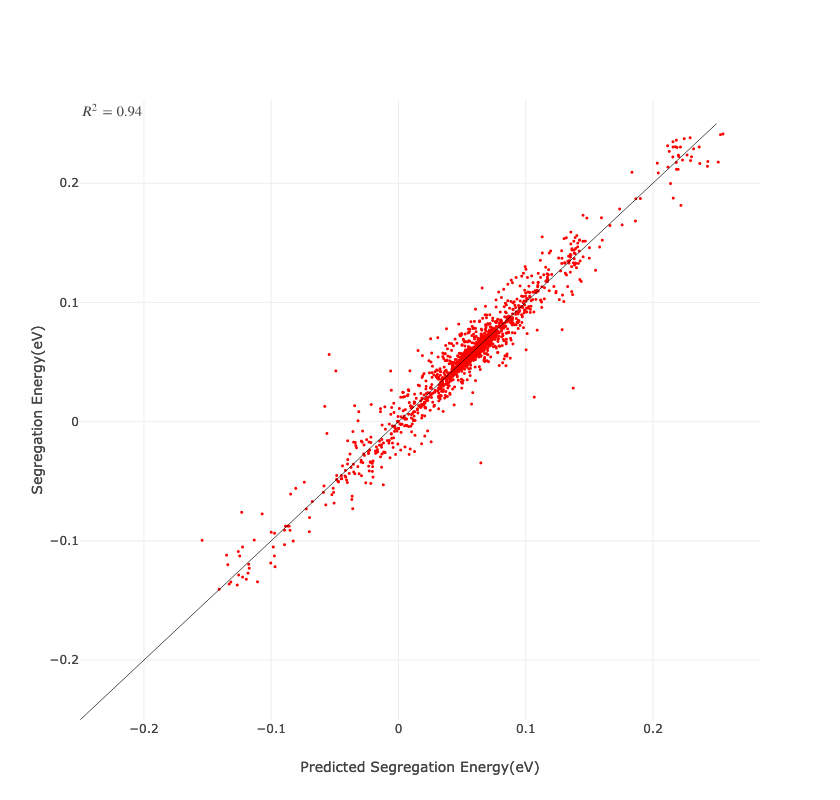

In [212]:
#draw correlation
main = go.Scatter(x = Y_cos_pred, 
          y = Y_cos, 
          marker={'color':'red', 'symbol':'circle','size':3}, 
          mode='markers'
         )

data = [main]

layout = go.Layout(autosize = False, 
           height = 800,
           width = 800, 
           xaxis={'title':"Predicted Segregation Energy(eV)", 'zeroline':False},
           yaxis = {'title':'Segregation Energy(eV)', 'zeroline':False},
           annotations = [
                   dict(
                   x = 0,
                   y = 1,
                   xref = 'paper',
                   yref = 'paper',
                   text = '$R^2= %4.2f$'%(R_squared),
                   showarrow = False,
                   font = dict(size = 12)
                   )
               ],
           shapes =[{'type':'line', 
                            'x0':-0.25,
                            'x1':0.25,
                            'y0':-0.25,
                            'y1':0.25,
                            'line':{'width':0.7}
                    }],
          )
plot = py.iplot(go.Figure(data = data, layout = layout))

In [213]:
X_test = torch.from_numpy(X_test)
X_test = X_test.float()
Y_test_pred = model1(X_test)
Y_test_pred = Y_test_pred.detach().numpy()
Y_test_pred = Y_test_pred.squeeze()
Y_test = Y_test.squeeze()
Y_mean = np.mean(Y_test)
SS_tot = np.sum(np.power(Y_test - Y_mean, 2))
SS_res = np.sum(np.power(Y_test_pred - Y_test, 2))
R_squared = 1-SS_res/SS_tot

In [214]:
R_squared

0.9544472979166893

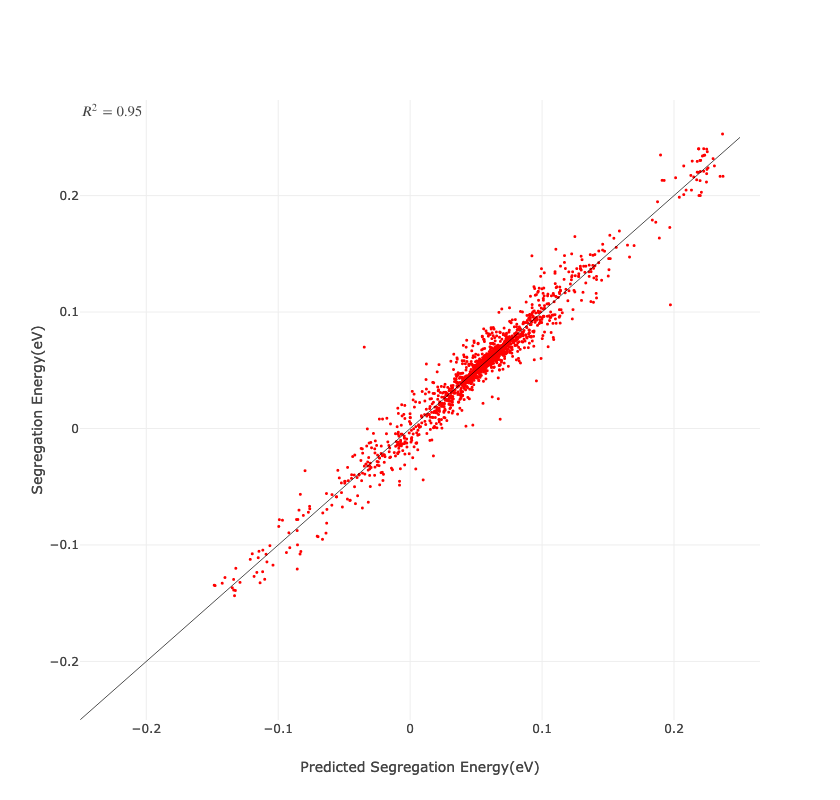

In [215]:
#draw correlation
main = go.Scatter(x = Y_test_pred, 
          y = Y_test, 
          marker={'color':'red', 'symbol':'circle','size':3}, 
          mode='markers'
         )

data = [main]

layout = go.Layout(autosize = False, 
           height = 800,
           width = 800, 
           xaxis={'title':"Predicted Segregation Energy(eV)", 'zeroline':False},
           yaxis = {'title':'Segregation Energy(eV)', 'zeroline':False},
           annotations = [
                   dict(
                   x = 0,
                   y = 1,
                   xref = 'paper',
                   yref = 'paper',
                   text = '$R^2= %4.2f$'%(R_squared),
                   showarrow = False,
                   font = dict(size = 12)
                   )
               ],
           shapes =[{'type':'line', 
                            'x0':-0.25,
                            'x1':0.25,
                            'y0':-0.25,
                            'y1':0.25,
                            'line':{'width':0.7}
                    }],
          )
plot = py.iplot(go.Figure(data = data, layout = layout))

In [ ]:
PATH = 'model_layers.pt'
torch.save(model, PATH)